# Business Analytics - TASK 5

In this notebook we analyse the various aspects of a business,  their sales, predictions etc.

### Business Analytics - To make Business related decisions, typically using Statistics and ML
![Supermarket Photo](https://raw.githubusercontent.com/Dutta-SD/Images_Unsplash/master/nrd-D6Tu_L3chLE-unsplash.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('./SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Information about the dataSet columns, will be helpful for us for calling different functions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Now we will answer some questions of our interest

### 0. Unique Country or only US data?

In [5]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

### 1. Maximum profit obtained

In [6]:
data[data.Profit == data.Profit.max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.95,5,0.0,8399.976


### 2. Mean Profit  and Standard Deviation for Profits for all regions

In [7]:
data.Profit.mean(), data.Profit.std()

(28.65689630778467, 234.2601076909573)

### 3. Region Wise Mean Profits

In [8]:
data[['Region', 'Sales', 'Quantity', 'Discount', 'Profit']].groupby(by = 'Region').mean()

,Sales,Quantity,Discount,Profit
Region,,,,
Central,215.772661,3.779595,0.240353,17.092709
East,238.336110,3.728230,0.145365,32.135808
South,241.803645,3.832716,0.147253,28.857673
West,226.493233,3.829535,0.109335,33.849032


### 4. Statewise Total Sales 

In [9]:
## This is a long list, so we look at the head of the tables
data[['Sales', 'State']].groupby('State').sum().head()

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180


### 5. Which Consumer Segment generates most profits?

In [10]:
data[['Profit', 'Segment']].groupby('Segment').mean()

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.818664


## Exploratory Data Analysis

Now we will explore our data and see the facets of the data.

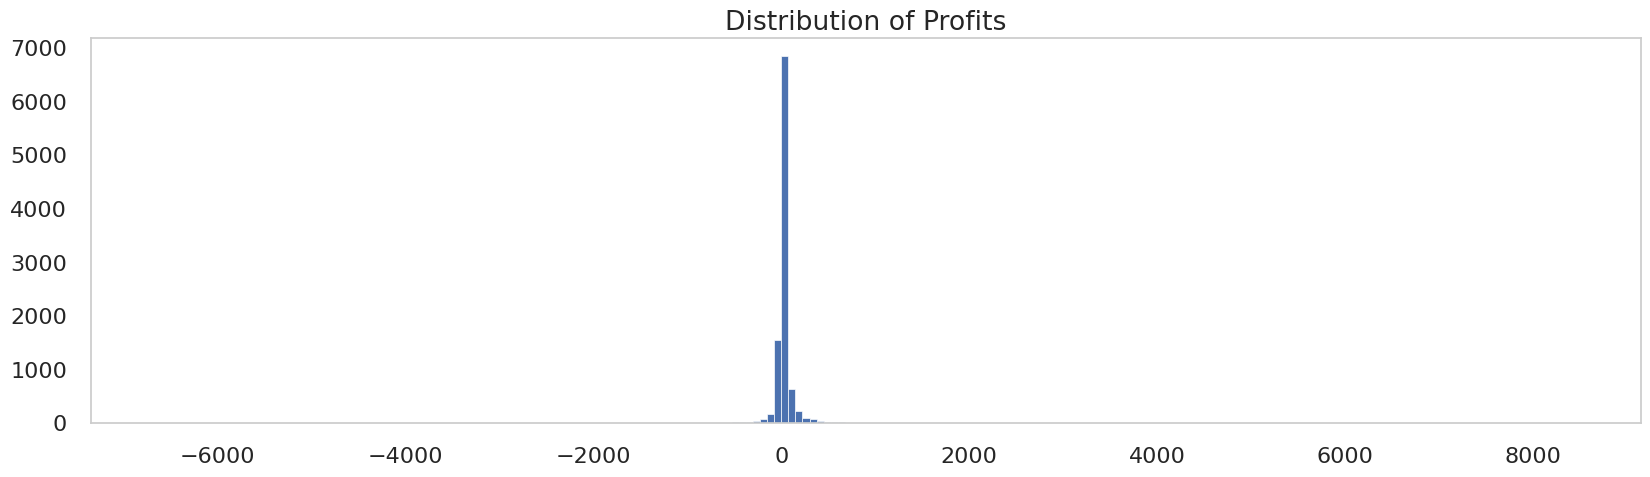

In [71]:
# Distribution of the profits
plt.figure(figsize=(20, 5))
plt.style.use('seaborn-poster')
plt.title('Distribution of Profits')
plt.grid(False)
plt.hist(x = data['Profit'], bins = 200);

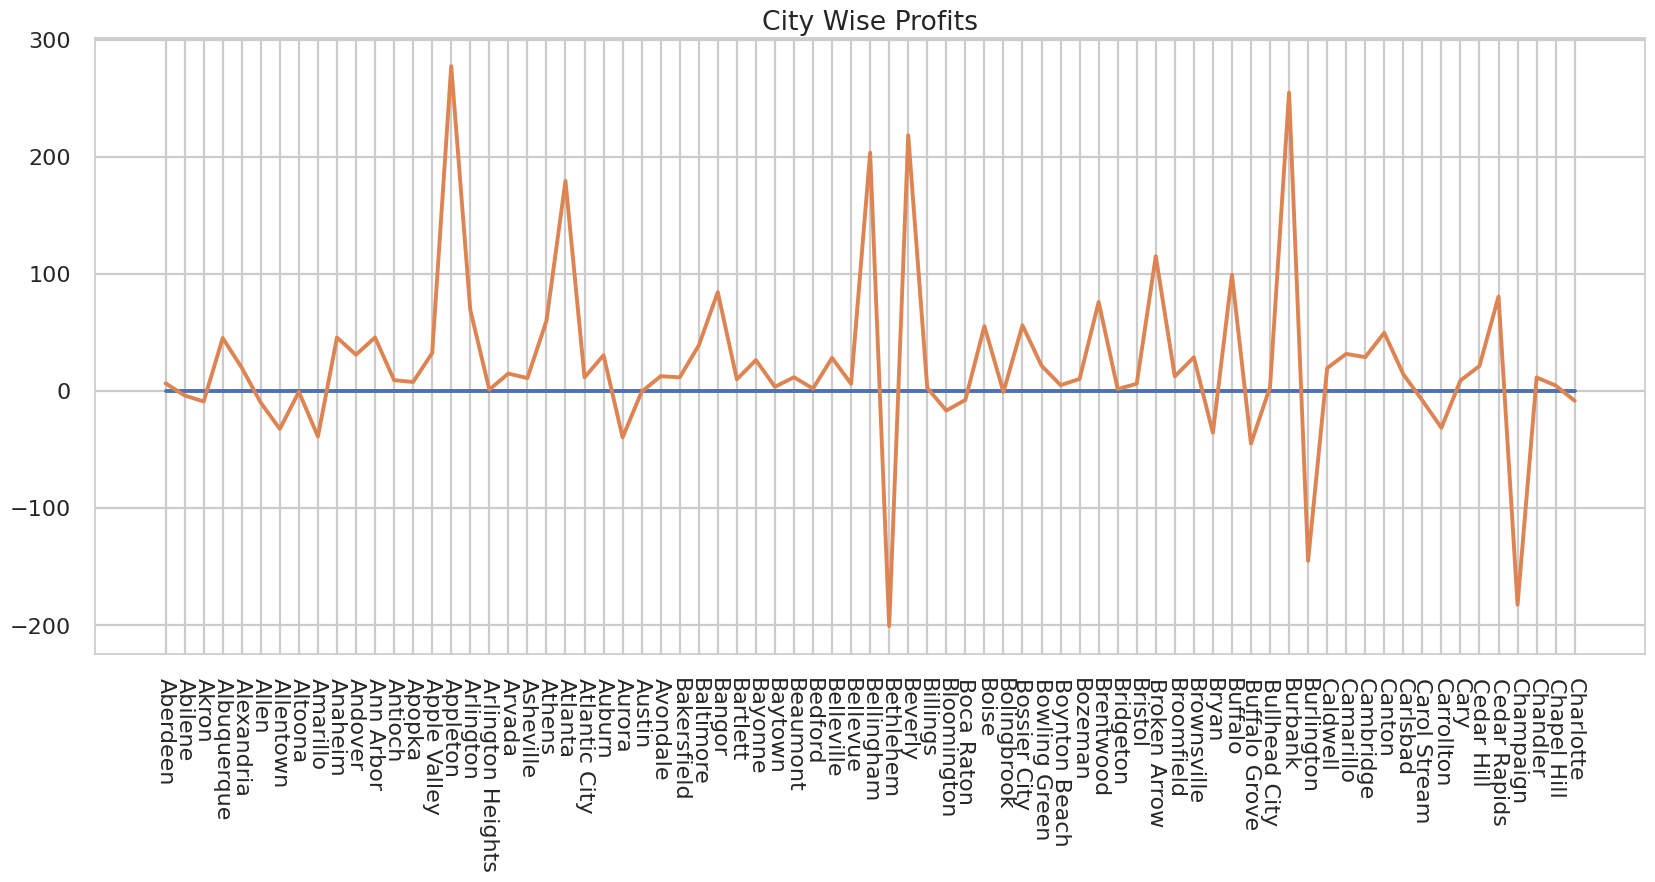

In [72]:
# <!--City Wise Profits -->

cityWiseProfits = data[['Profit', 'City']].groupby(by = 'City').mean()

## The plots are very long, does not fit into screen
## So I am taking first 75 points for the plot

plt.figure(figsize = (20, 8))
plt.title('City Wise Profits')

plt.xticks(rotation = 270)   ### rotating ticks

plt.plot(np.zeros(75))   ## for getting 0 line

plt.plot(cityWiseProfits.Profit[:75]);

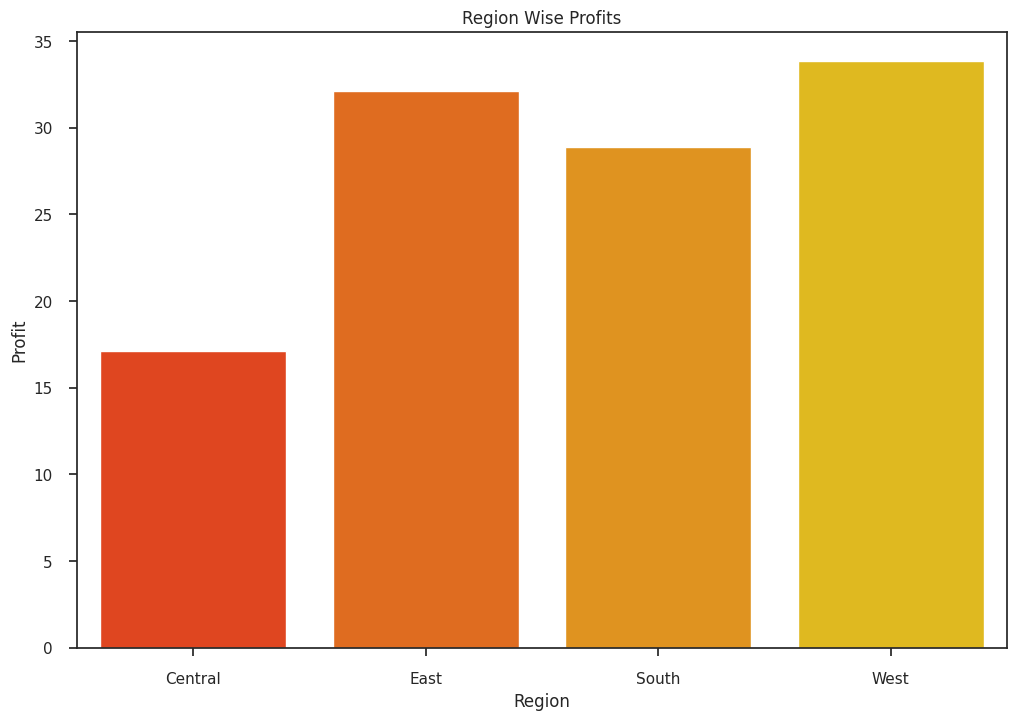

In [75]:
# <!-- Region Wise Profits -->

regionWiseProfits = data[['Profit', 'Region']].groupby(by = 'Region').mean()

plt.figure(figsize = (12, 8))

plt.title('Region Wise Profits')

sns.set(style = 'ticks')

sns.barplot(x = regionWiseProfits.index,
            y = regionWiseProfits.Profit,
            data = regionWiseProfits,
           palette = 'autumn');

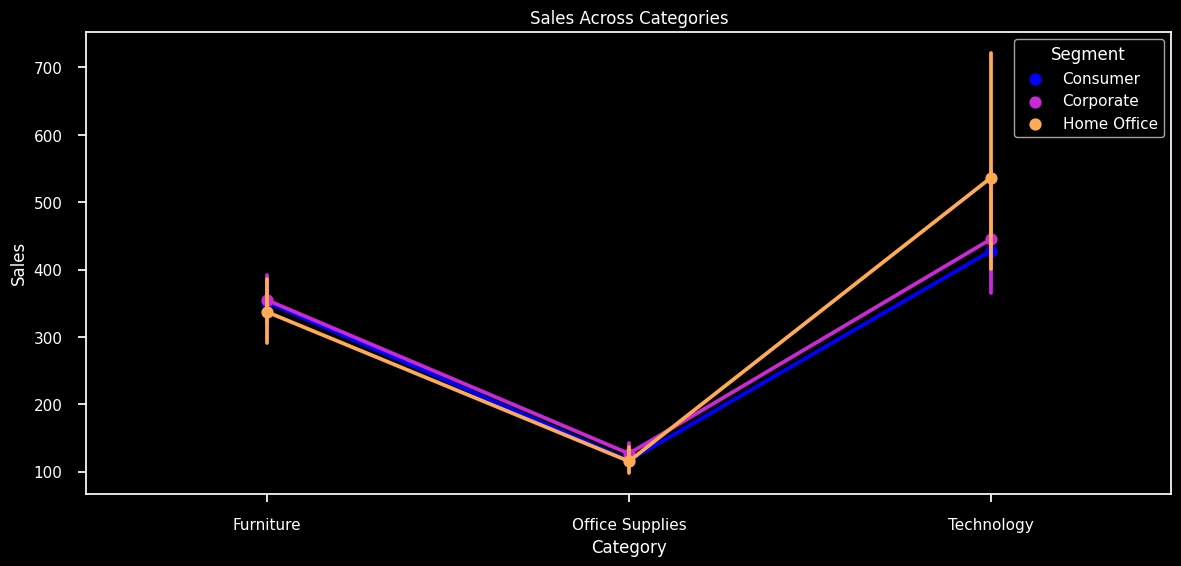

In [77]:
# <!-- sales of category items -->
categorySales = data[['Category', 'Sales', 'Segment']]

plt.figure(figsize = (14, 6))

plt.title('Sales Across Categories')

plt.style.use('dark_background')
sns.pointplot(x = 'Category',
             y = 'Sales',
             data = categorySales,
             hue = 'Segment',
           palette = 'gnuplot2');

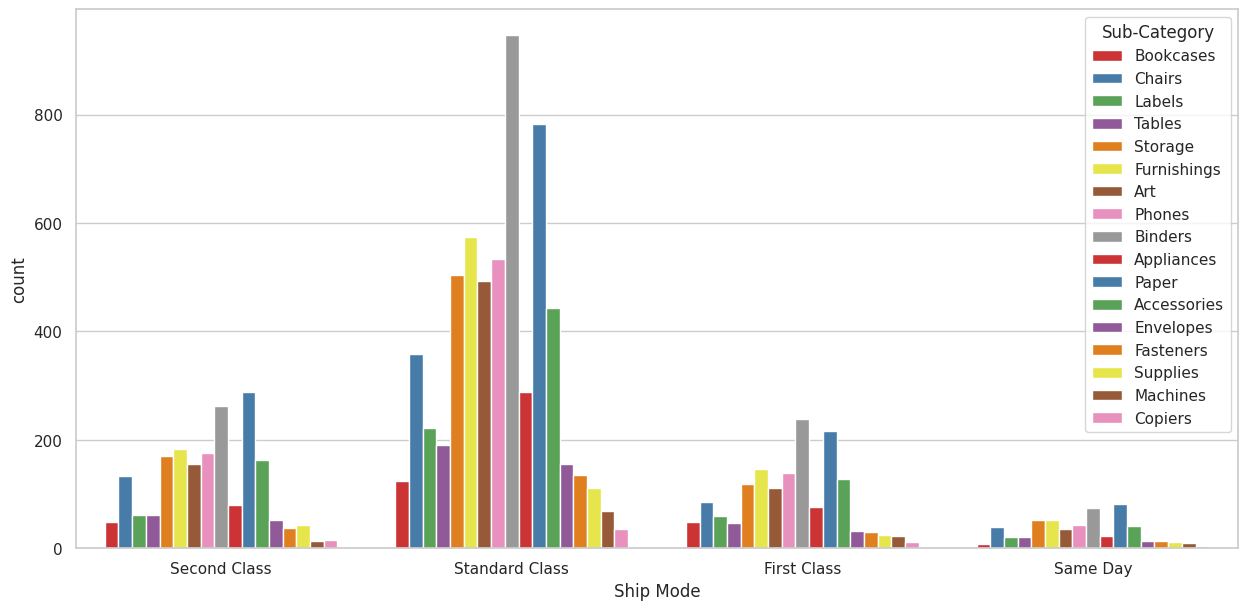

In [79]:
# <!-- Shipping Mode -->
plt.figure(figsize=(15, 7))
plt.style.use('default')
sns.set(style = 'whitegrid')
sns.countplot(x = 'Ship Mode',
              data = data,
             hue = 'Sub-Category',
             palette = 'Set1');

## Some Hypothesis Tests

Hypothesis testing is used to check if our assumptions about our data is valid or not. It is very useful and helps us simplify our tasks of making sense of our data.

In [80]:
# Drop some columns which we do not consider in our analysis
## if needed, we can add it later
data.drop(['Country', 'Postal Code', 'Discount', 'Sales', 'Quantity'],
         axis = 1,
         inplace = True)

### Kendall's $\tau$ Test

This test is useful for checking if an **ordinal variable** is related to a **numeric variable**.

* $ \tau \ close\ to\ 0\ means\ that\ there\ is\ no\ relation.$
* $ \tau\ close\ to\ -1\ indicates\ strong\ disagreement.$
* $ \tau \ close\ to\ 1\ indicates\ strong\ agreement.$

Source : [link](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

In [81]:
from scipy.stats import kendalltau

## If shipping mode is related to profit somehow

kendalltau(data['Ship Mode'], data['Profit'])

KendalltauResult(correlation=-0.01494690137981871, pvalue=0.05291081502911007)

The correlation is low in this case. So this is not likely to be useful for predictive purposes

In [82]:
## Is city a good predictor?

kendalltau(data['City'], data['Profit'])

KendalltauResult(correlation=0.05946723764311979, pvalue=1.3344952377726723e-18)

In [83]:
## Is state a good predictor??

kendalltau(data['State'], data['Profit'])

KendalltauResult(correlation=-0.09200000353571018, pvalue=2.1311577200945683e-40)

These values for Kendall $\tau$ although small are misleading, since we have almost one unique category for each value.

### $\chi^2$ Test for Categorical Variables

$\chi^2$ test assesses the correlation between two **categorical variables**

Our initial hypothesis is that the two variables are independent. Then we test this.

If the p value comes out to be less than 0.05, then the values are independent. Else they are dependent.

For this test, we need to build a contingency table made by using `pd.crosstab`.

In [84]:
a = pd.crosstab(data['Category'], data['Segment'])

from scipy.stats import chi2_contingency

# Does the segment someone belongs to  affect the category they order more?
# For example, does offices order more technology stuff or something else?

chi2_contingency (a)

(1.4612447366020676,
 0.8334835825190556,
 4,
 array([[1101.67210326,  640.92655593,  378.4013408 ],
        [3129.97458475, 1820.94456674, 1075.08084851],
        [ 959.35331199,  558.12887733,  329.51781069]]))

As we can see, the p-value is more then 0.05, which means that the values are correlated

## Model Building

In [85]:
## Drop these columns on the basis of our hypothesis test results
## we also drop the city column as State seems to be more significant to predict the profit

data2 = pd.get_dummies(data.drop(['Segment', 'Ship Mode', 'City'], 1))

In [86]:
data2.head()

,Profit,State_Alabama,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,41.9136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,219.5820,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.8714,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,-383.0310,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2.5164,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge  ## Ridge for normalisation
from sklearn.metrics import r2_score

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data2.iloc[:, 1:],
                                                    data2.iloc[:,1],
                                                   shuffle = True,
                                                   random_state = 44)

In [89]:
model = Ridge()
y_preds = model.fit(X_train, y_train).predict(X_test)

r2_score(y_test, y_preds)

0.9995961851837762